In [20]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
#importing data and splitting into training and testing
data = np.array(train)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255


In [40]:
def init_params():
  W1 = np.random.randn(10,784) / np.sqrt(784)
  b1 = np.random.randn(10,1)
  W2 = np.random.randn(10,10) / np.sqrt(10)
  b2 = np.random.randn(10,1)
  return W1,b1,W2,b2

In [24]:
#this defines the activator function for the first layer
def ReLU(x):
  return np.maximum(x,0)

In [25]:
#this defines the activator function for the last layer
def softmax(x):
  A = np.exp(x)/sum(np.exp(x))  # Subtracting max for numerical stability
  return A

In [26]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1)
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [27]:
#this function ecodes the output array to a 10x1 matrix of 0s and 1s
def one_hot(Y):
  one_hot = np.zeros((Y.size, Y.max()+1))
  one_hot[np.arange(Y.size), Y] = 1
  one_hot = one_hot.T
  return one_hot


In [28]:
def deriv_ReLU(x):
  return x>0

In [38]:
def back_prop(Z1, A1, Z2, A2, W2,X, Y):
  #m = Y.size

  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m*dZ2.dot(A1.T)
  db2 = 1/m*np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
  dW1 = 1/m*dZ1.dot(X.T)
  db1 = 1/m*np.sum(dZ1)
  return dW1,db1,dW2,db2


In [30]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha ):
  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1, b1, W2, b2

In [31]:
def get_predictions(A2):
  return np.argmax(A2, 0)

In [32]:
def get_accuracy(predictions, Y):
  #print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

In [33]:
def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2,X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 10 == 0:
      print('Iterations: ', i)
      print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2




In [44]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [47]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 200, 0.2)

Iterations:  0
Accuracy:  0.10429268292682926
Iterations:  10
Accuracy:  0.45826829268292685
Iterations:  20
Accuracy:  0.6712682926829269
Iterations:  30
Accuracy:  0.7460731707317073
Iterations:  40
Accuracy:  0.7825609756097561
Iterations:  50
Accuracy:  0.804609756097561
Iterations:  60
Accuracy:  0.820170731707317
Iterations:  70
Accuracy:  0.833
Iterations:  80
Accuracy:  0.8418536585365853
Iterations:  90
Accuracy:  0.8493658536585366
Iterations:  100
Accuracy:  0.8559024390243902
Iterations:  110
Accuracy:  0.8623170731707317
Iterations:  120
Accuracy:  0.8670975609756097
Iterations:  130
Accuracy:  0.8711219512195122
Iterations:  140
Accuracy:  0.8746341463414634
Iterations:  150
Accuracy:  0.8780975609756098
Iterations:  160
Accuracy:  0.8809512195121951
Iterations:  170
Accuracy:  0.8835365853658537
Iterations:  180
Accuracy:  0.8855365853658537
Iterations:  190
Accuracy:  0.8875853658536585


Prediction:  [9]
Label:  7


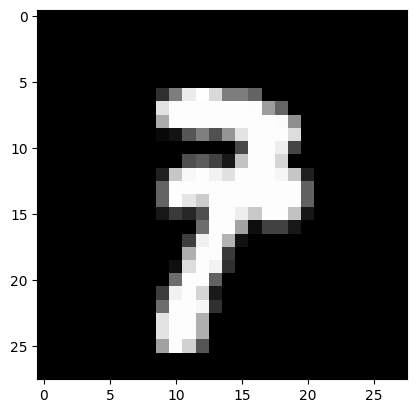

Prediction:  [9]
Label:  9


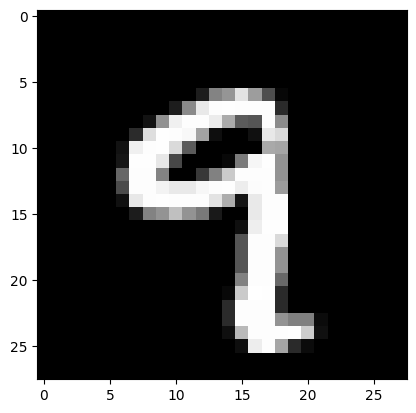

Prediction:  [1]
Label:  1


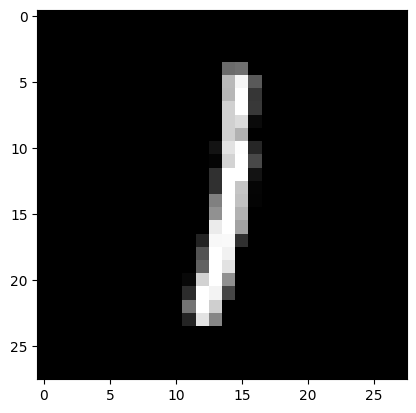

Prediction:  [3]
Label:  3


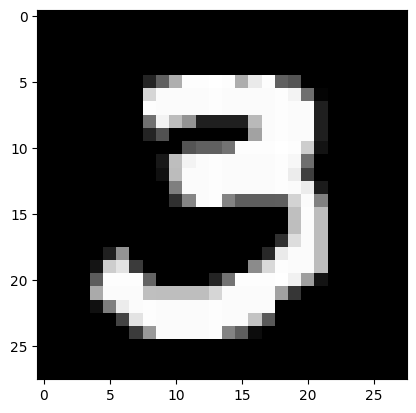

In [46]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)